### Improved training of wasserstein GANs

**Reference:**
Gulrajani, I., Ahmed, F., Arjovsky, M., Dumoulin, V., & Courville, A. (2017). Improved training of wasserstein gans. arXiv preprint arXiv:1704.00028.
    
**Description:** Yet another variant of the Generative Adversarial Network framework. The discriminator is replaced by a critic, which tries to pull the fake samples away from the real ones rather than explicitly classifying them. The critic is strongly regularized using a gradient penalty, an trained for several steps before each generator update. This GAN variant provides a better behaved training process than conventional GANs, with a remarkable robustness againts generator collapse mode.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

from datasets.generative import get_small_utk_faces

In [2]:
X_train = get_small_utk_faces()
X_train = tf.cast(X_train, dtype=tf.dtypes.float32) / 127.5 - 1

print("Data in range: ", np.min(X_train), np.max(X_train))

Data in range:  -1.0 1.0


In [3]:
def build_generator():
    model = keras.models.Sequential()
    model.add(keras.layers.Input((150,)))
    model.add(keras.layers.Dense(4 * 4 * 1024))
    model.add(keras.layers.Reshape((4, 4, 1024)))

    model.add(keras.layers.Conv2DTranspose(512, kernel_size=4, strides=2, padding="same"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    
    model.add(keras.layers.Conv2DTranspose(512, kernel_size=4, strides=2, padding="same"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    
    model.add(keras.layers.Conv2DTranspose(512, kernel_size=4, strides=2, padding="same"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    
    model.add(keras.layers.Conv2D(3, kernel_size=3, padding="same", activation="tanh"))
    return model

def build_critic():
    custom_initializer = keras.initializers.RandomNormal(stddev=0.001)
    
    model = keras.models.Sequential()
    model.add(keras.layers.Input((32, 32, 3)))
    model.add(keras.layers.Conv2D(64, kernel_size=3, strides=2, padding="same", kernel_initializer=custom_initializer))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.LeakyReLU(alpha=0.2))
    model.add(keras.layers.Conv2D(128, kernel_size=3, strides=2, padding="same", kernel_initializer=custom_initializer))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.LeakyReLU(alpha=0.2))
    model.add(keras.layers.Conv2D(128, kernel_size=3, strides=2, padding="same", kernel_initializer=custom_initializer))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.LeakyReLU(alpha=0.2))
    model.add(keras.layers.Conv2D(256, kernel_size=3, strides=2, padding="same", kernel_initializer=custom_initializer))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.LeakyReLU(alpha=0.2))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(1, kernel_initializer=custom_initializer))
    return model

def generate_noise(batch_size, dimension=150):
    return tf.random.normal((batch_size, dimension))

In [4]:
def generate_and_plot_images(generator):
    noise = generate_noise(10)
    fake_imgs = generator.predict(noise)
    for i in range(2):
        for j in range(5):
            ax = plt.subplot(2, 5, 5*i + j + 1)
            ax.imshow(fake_imgs[5*i + j]/2 + 0.5)
            ax.axis("off")
    plt.tight_layout()
    plt.show()
    
def plot_10_images(imgs):
    for i in range(2):
        for j in range(5):
            ax = plt.subplot(2, 5, 5*i + j + 1)
            ax.imshow(imgs[5*i + j]/2 + 0.5)
            ax.axis("off")
    plt.tight_layout()
    plt.show()
    
def plot_metrics(critic_fake_predictions, critic_real_predictions, negative_loss_history):
    plt.figure(figsize=(10,3))
    ax = plt.subplot(1,2,1)
    ax.scatter(critic_fake_predictions.numpy(), np.random.rand(64), label="fake", c="green", s=5)
    ax.scatter(critic_real_predictions, np.random.rand(64), label="real", c="blue", s=5)
    ax.set_xlabel("Critic outputs")
    ax.set_ylim(-3, 3)
    ax.axes.get_yaxis().set_visible(False)
    ax.legend()
    
    ax = plt.subplot(1,2,2)
    ax.plot(negative_loss_history)
    ax.set_xlabel("Training step / plot_stats_frequency")
    ax.set_ylabel("Negative loss")
    plt.show()
    
class Batchify:
    def __init__(self, X, batch_size):
        self.idx = 0
        self.X = X
        self.batch_size = batch_size
        
    def get_batch(self):
        if self.idx > len(self.X) - batch_size:
            self.idx = 0
            self.X = tf.random.shuffle(self.X)
        
        batch = self.X[self.idx: self.idx + self.batch_size]
        self.idx += self.batch_size
        return batch

In [5]:
critic = build_critic()
critic_optimizer = keras.optimizers.Adam(learning_rate=0.0005, beta_1=0, beta_2=0.9)

generator = build_generator()
generator_optimizer = keras.optimizers.Adam(learning_rate=0.0005, beta_1=0, beta_2=0.9)

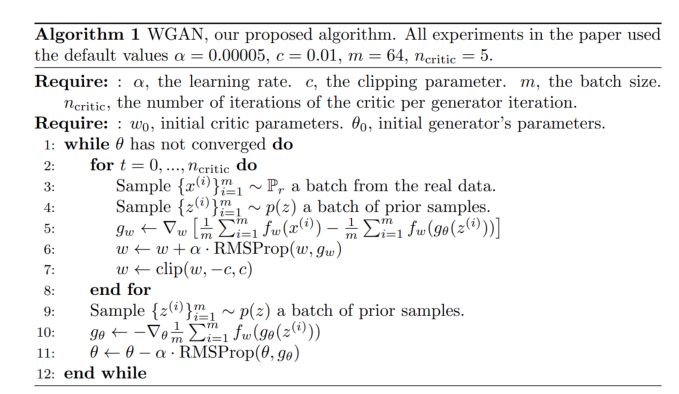

In [18]:
# From: Improved training of wasserstein gans. arXiv preprint arXiv:1704.00028. Gulrajani, I., Ahmed, F., Arjovsky, M., Dumoulin, V., & Courville, A. (2017).

Executed 2000 training steps so far.


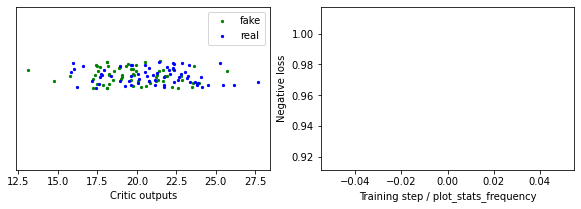

Fake images: 


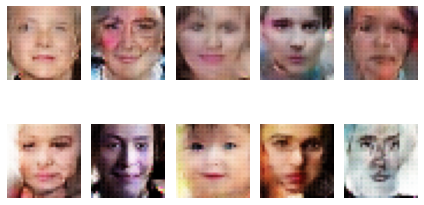

Real images: 


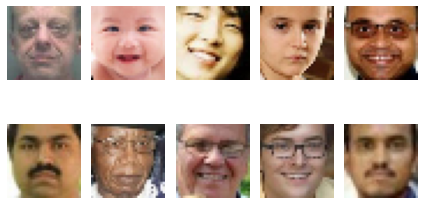

Executed 4000 training steps so far.


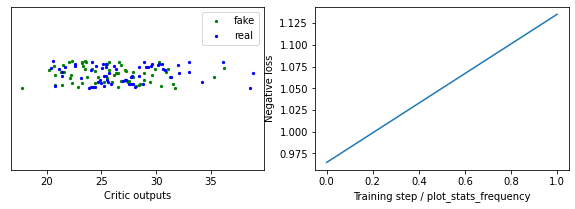

Fake images: 


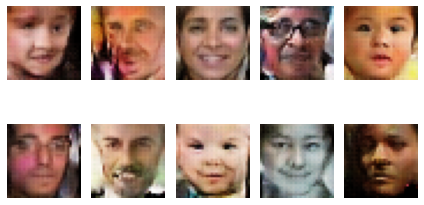

Real images: 


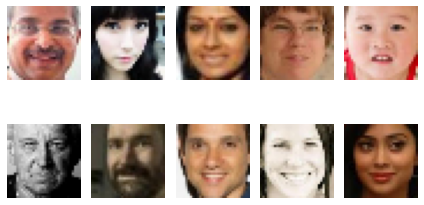

Executed 6000 training steps so far.


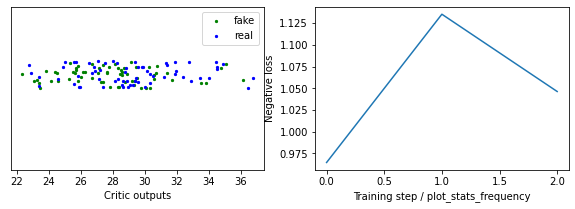

Fake images: 


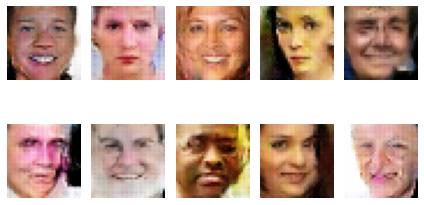

Real images: 


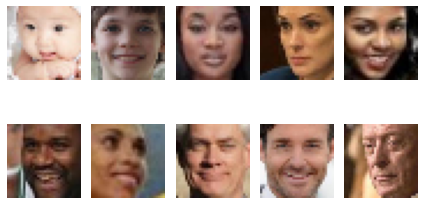

Executed 8000 training steps so far.


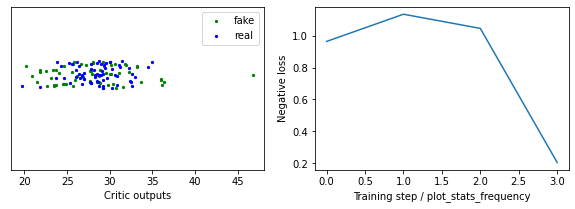

Fake images: 


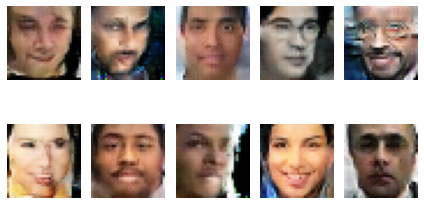

Real images: 


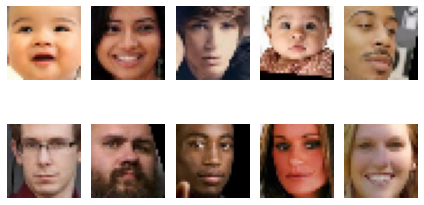

Executed 10000 training steps so far.


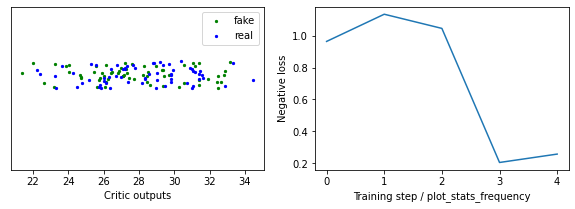

Fake images: 


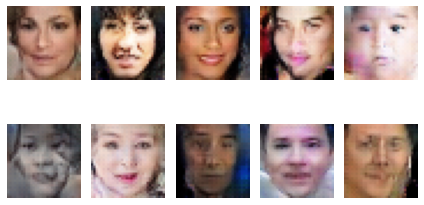

Real images: 


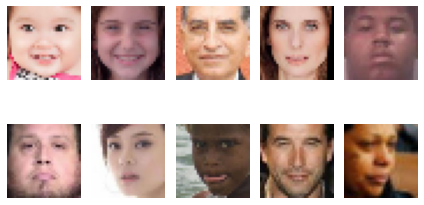

Executed 12000 training steps so far.


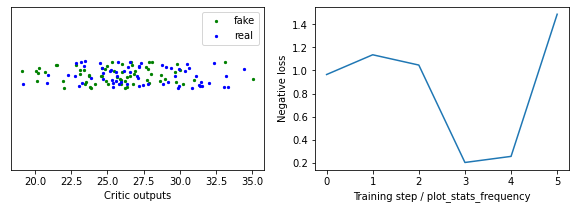

Fake images: 


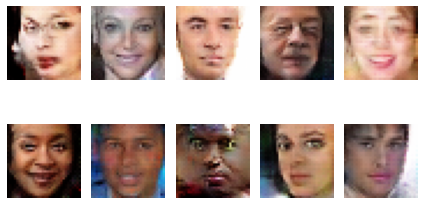

Real images: 


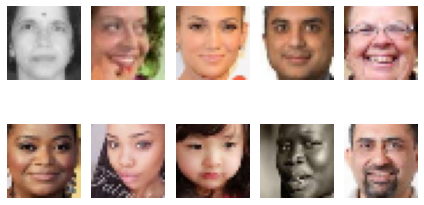

Executed 14000 training steps so far.


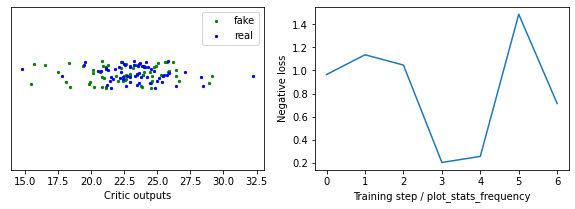

Fake images: 


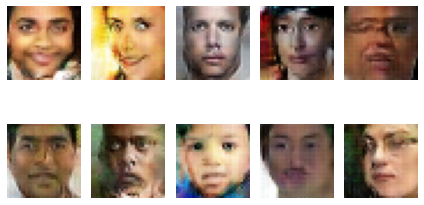

Real images: 


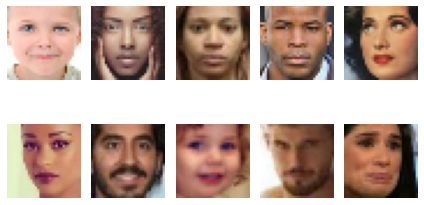

Executed 16000 training steps so far.


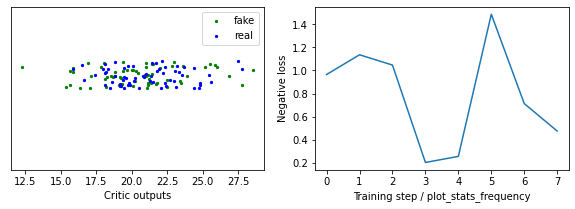

Fake images: 


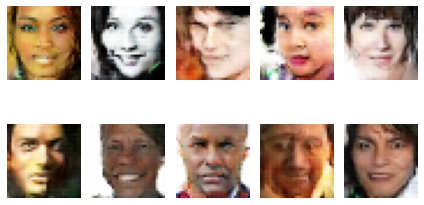

Real images: 


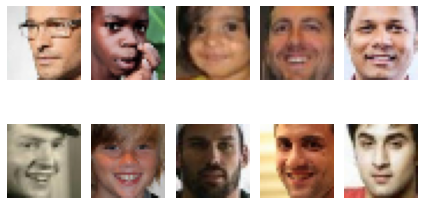

Executed 18000 training steps so far.


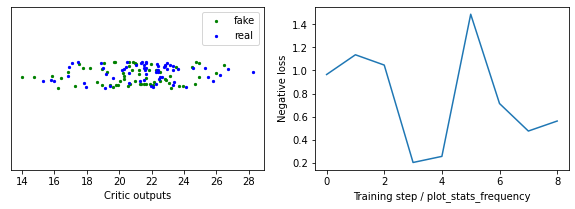

Fake images: 


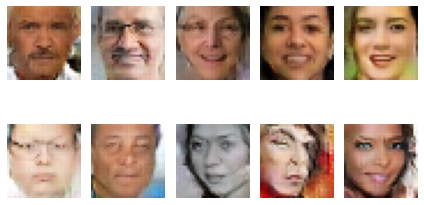

Real images: 


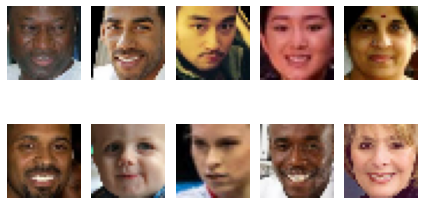

Executed 20000 training steps so far.


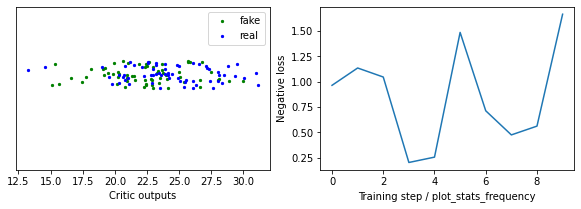

Fake images: 


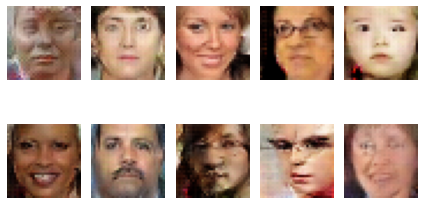

Real images: 


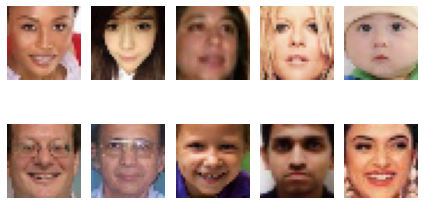

Executed 22000 training steps so far.


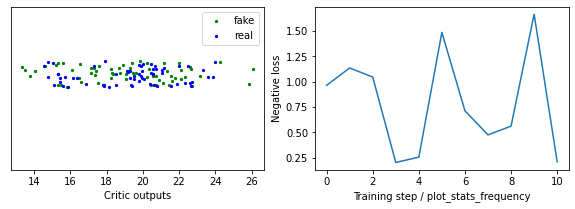

Fake images: 


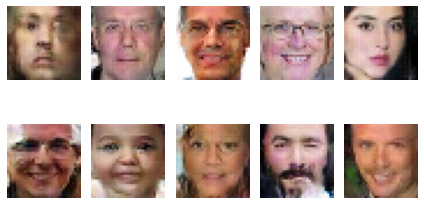

Real images: 


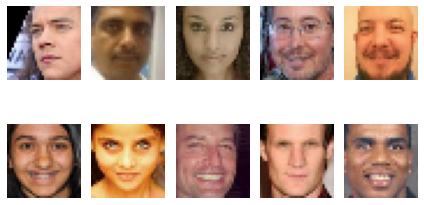

Executed 24000 training steps so far.


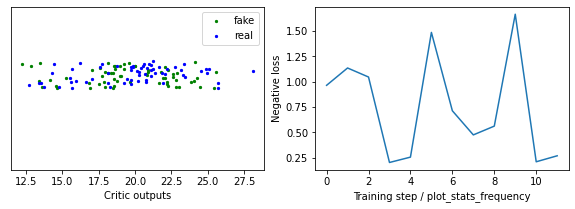

Fake images: 


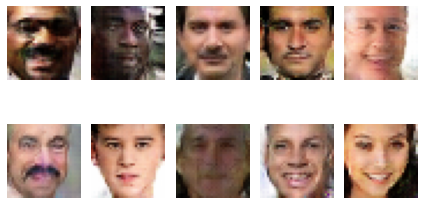

Real images: 


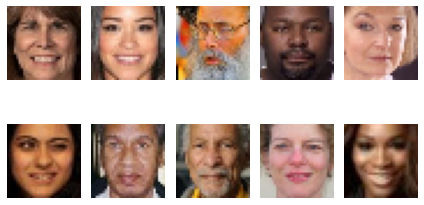

Executed 26000 training steps so far.


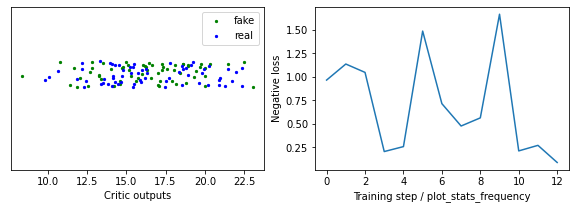

Fake images: 


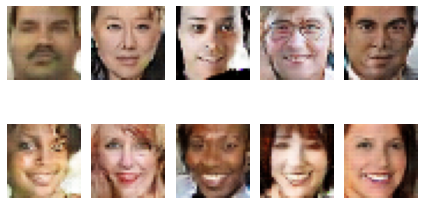

Real images: 


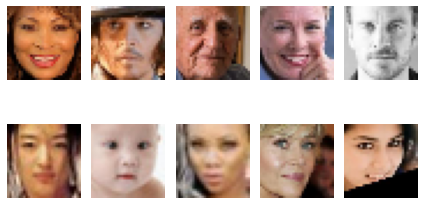

Executed 28000 training steps so far.


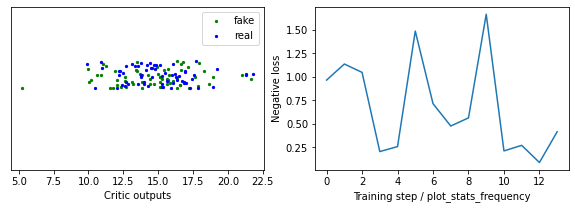

Fake images: 


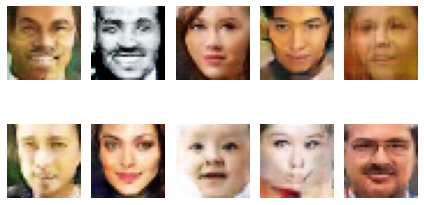

Real images: 


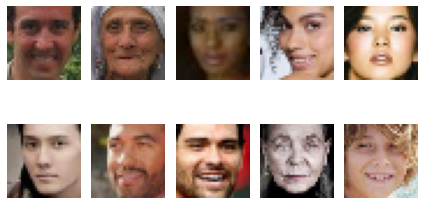

Executed 30000 training steps so far.


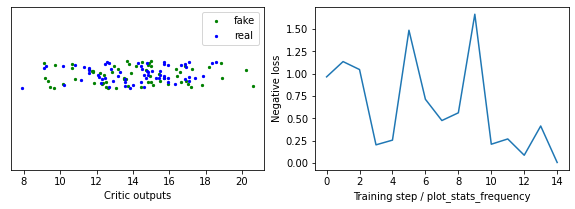

Fake images: 


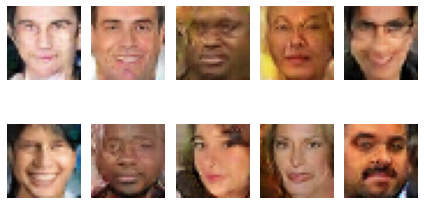

Real images: 


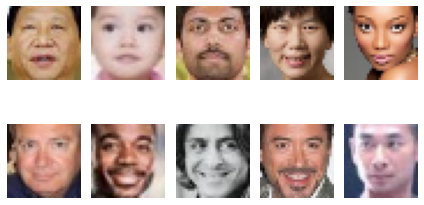

Executed 32000 training steps so far.


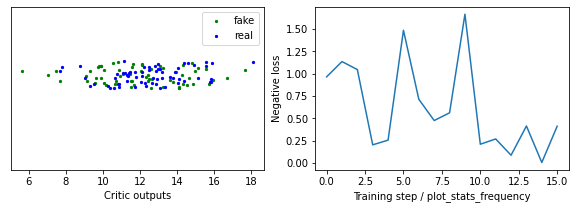

Fake images: 


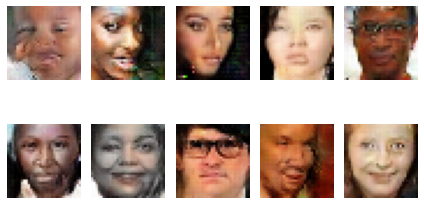

Real images: 


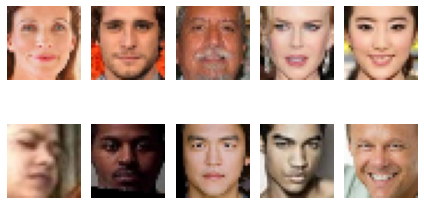

Executed 34000 training steps so far.


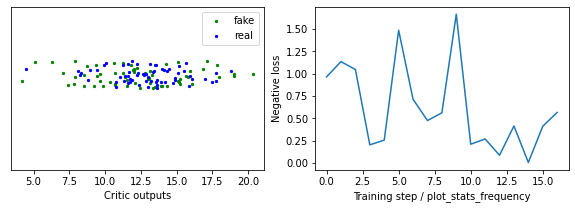

Fake images: 


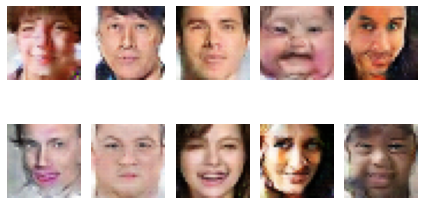

Real images: 


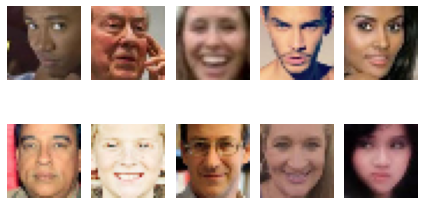

Executed 36000 training steps so far.


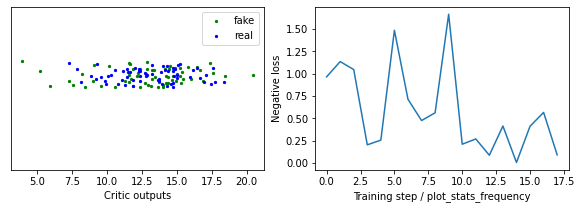

Fake images: 


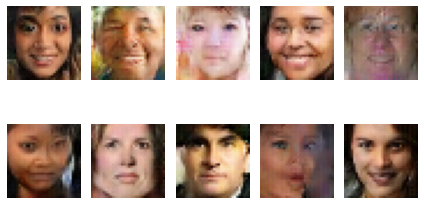

Real images: 


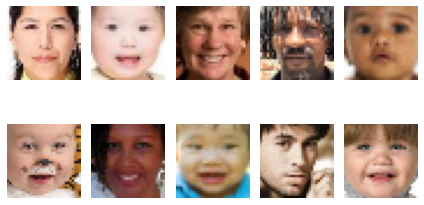

In [ ]:
negative_loss_history = []
plot_stats_frequency = 2000
training_steps = 100000
batch_size = 64
n_critic = 5
gradient_penaly_weight = 10

data_loader = Batchify(X_train, batch_size)

for step in range(training_steps):
    # OPTIMIZE CRITIC (N_CRITIC STEPS)
    for _ in range(n_critic):

        real_imgs = data_loader.get_batch()
        noise = generate_noise(batch_size)
        fake_imgs = generator(noise, training=True)
        epsilons = tf.random.uniform((batch_size, 1, 1, 1))
        
        with tf.GradientTape(persistent=True) as tape:
            real_fake_imgs = epsilons * fake_imgs + (1 - epsilons) * real_imgs
            tape.watch(real_fake_imgs)
            
            critic_real_predictions = critic(real_imgs, training=True)
            critic_fake_predictions = critic(fake_imgs, training=True)
            critic_real_fake_predictions = critic(real_fake_imgs, training=True)
        
            critic_output_gradient = tf.reshape(tape.gradient(critic_real_fake_predictions, real_fake_imgs), (batch_size, -1))
            gradient_penalty = gradient_penaly_weight * tf.reduce_mean((tf.norm(critic_output_gradient, axis=1) - 1) ** 2)           
            critic_loss = tf.reduce_mean(critic_fake_predictions) - tf.reduce_mean(critic_real_predictions) + gradient_penalty

        critic_gradients = tape.gradient(critic_loss, critic.trainable_variables)
        critic_optimizer.apply_gradients(zip(critic_gradients, critic.trainable_variables))

    if step > 0 and step % plot_stats_frequency == 0:
        print(f"Executed {step} training steps so far.")
        negative_loss_history.append( - critic_loss.numpy())
        plot_metrics(critic_fake_predictions, critic_real_predictions, negative_loss_history)  
        print("Fake images: ")
        generate_and_plot_images(generator)
        print("Real images: ")
        plot_10_images(real_imgs)
        
    # OPTIMIZE GENERATOR (1 STEP)    
    noise = generate_noise(batch_size)
    with tf.GradientTape() as tape:        
        generator_loss = - tf.reduce_mean(critic(generator(noise, training=True), training=True))
    generator_gradients = tape.gradient(generator_loss, generator.trainable_variables)
    generator_optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables))    

Some generated faces:


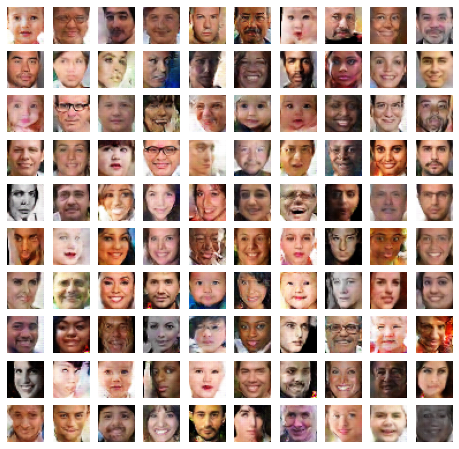

In [84]:
noise = generate_noise(100)
faces = 0.5 * generator.predict(noise) + 0.5

print("Some generated faces:")
plt.figure(figsize=(8, 8))
for i in range(10):
    for j in range(10):
        ax = plt.subplot(10,10,10*i+j+1)
        ax.imshow(faces[10*i+j])
        ax.axis("off")
plt.show()

Face interpolation:


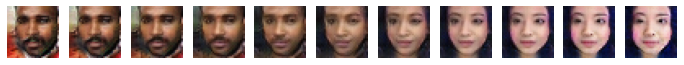

In [35]:
noise_a, noise_b = generate_noise(2)
noise = np.asarray([fraction * noise_a + (1-fraction) * noise_b for fraction in np.arange(0, 1.1, 0.1)])
faces = 0.5 * generator.predict(noise) + 0.5

print("Face interpolation:")
plt.figure(figsize=(12,7))
for i in range(11):
    ax = plt.subplot(1,11,i+1)
    ax.imshow(faces[i])
    ax.axis("off")
plt.show()